In [3]:
pip install tensorflow numpy pandas matplotlib opencv-python

     ---------------------------------------- 12.9/12.9 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 11.6/11.6 MB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 8.0/8.0 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 39.5/39.5 MB 3.5 MB/s eta 0:00:00
     -------------------------------------- 390.2/390.2 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 1.9 MB/s eta 0:00:00
     -------------------------------------- 434.5/434.5 kB 5.4 MB/s eta 0:00:00
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
     ---------------------------------------- 4.3/4.3 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 3.8 MB/s et


[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
damaged_images_path = "damaged-and-intact-packages/damaged"
intact_images_path = "damaged-and-intact-packages/intact"

In [9]:
import os
import pandas as pd

In [13]:
import os

# Define the correct paths for your dataset
damaged_images_path ="damaged-and-intact-packages/damaged"
intact_images_path = "damaged-and-intact-packages/intact"  

# Initialize lists
damaged = []
intact = []

# Check if the paths exist
if not os.path.exists(damaged_images_path):
    print(f"Error: Path {damaged_images_path} does not exist!")
if not os.path.exists(intact_images_path):
    print(f"Error: Path {intact_images_path} does not exist!")

# Collect damaged image paths
for image in os.listdir(damaged_images_path):
    damaged.append((os.path.join(damaged_images_path, image), 1))  # 1 for 'damaged' label

# Collect intact image paths
for image in os.listdir(intact_images_path):
    intact.append((os.path.join(intact_images_path, image), 0))  # 0 for 'intact' label

# Print some samples to verify
print("Sample damaged images:", damaged[:5])
print("Sample intact images:", intact[:5])


Sample damaged images: [('damaged-and-intact-packages/damaged\\damagedfoodpackagingbox0.jpeg', 1), ('damaged-and-intact-packages/damaged\\damagedfoodpackagingbox10.jpeg', 1), ('damaged-and-intact-packages/damaged\\damagedfoodpackagingbox102.jpeg', 1), ('damaged-and-intact-packages/damaged\\damagedfoodpackagingbox103.jpeg', 1), ('damaged-and-intact-packages/damaged\\damagedfoodpackagingbox11.jpeg', 1)]
Sample intact images: [('damaged-and-intact-packages/intact\\fooditemboxes104.jpeg', 0), ('damaged-and-intact-packages/intact\\fooditemboxes105.webp', 0), ('damaged-and-intact-packages/intact\\fooditemboxes106.jpeg', 0), ('damaged-and-intact-packages/intact\\fooditemboxes107.jpeg', 0), ('damaged-and-intact-packages/intact\\fooditemboxes11.jpeg', 0)]


In [14]:

damaged = []
intact = []

for image in os.listdir(damaged_images_path):
    damaged.append((os.path.join(damaged_images_path, image), 1))

for image in os.listdir(intact_images_path):
    intact.append((os.path.join(intact_images_path, image), 0))

In [15]:
damaged_df = pd.DataFrame(damaged, columns = ['img_path', 'class'])
damaged_df['class'] = damaged_df['class'].astype('str')

intact_df = pd.DataFrame(intact, columns = ['img_path', 'class'])
intact_df['class'] = intact_df['class'].astype('str')

In [2]:
import sys
print(sys.executable)

c:\Users\anubh\Desktop\Model Prediction\env\Scripts\python.exe


In [16]:
# split the damaged and intact images into train, validation and test images
from sklearn.model_selection import train_test_split

damaged_train_df, damaged_val_df = train_test_split(damaged_df, test_size=0.3, random_state=7)
damaged_val_df, damaged_test_df = train_test_split(damaged_val_df, test_size=0.5, random_state=7)

intact_train_df, intact_val_df = train_test_split(intact_df, test_size=0.3, random_state=7)
intact_val_df, intact_test_df = train_test_split(intact_val_df, test_size=0.5, random_state=7)

In [19]:

# create the final dataset for train, validation and test that contains both damaged and intact images in equal proportions
train_df = pd.concat([damaged_train_df, intact_train_df])
val_df = pd.concat([damaged_val_df, intact_val_df])
test_df = pd.concat([damaged_test_df, intact_test_df])

# shuffle the dataset
train_df = train_df.sample(frac = 1)
val_df = val_df.sample(frac = 1)
test_df = test_df.sample(frac = 1)

In [20]:
train_df.head(10)

,img_path,class
25,damaged-and-intact-packages/damaged\damagedfoo...,1
146,damaged-and-intact-packages/intact\medicinepac...,0
85,damaged-and-intact-packages/damaged\packagingb...,1
181,damaged-and-intact-packages/damaged\packagingb...,1
123,damaged-and-intact-packages/intact\medicinepac...,0
159,damaged-and-intact-packages/intact\medicinepac...,0
274,damaged-and-intact-packages/intact\packagingbo...,0
44,damaged-and-intact-packages/damaged\damagedfoo...,1
323,damaged-and-intact-packages/intact\packagingbo...,0
41,damaged-and-intact-packages/damaged\damagedfoo...,1


In [21]:


import tensorflow as tf

In [22]:
img_width = 256
img_height = 256
n_channels = 1
batch_size = 16
class_names = ['intact', 'damaged']
num_classes = 2

In [23]:

# data generator for training dataset, performs data augmentations
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True
)

# data generator for validation and testing dataset, here no data augmentation is performed
val_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [24]:

train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'img_path',
    y_col = 'class',
    target_size = (img_width, img_height),
    color_mode = 'rgb',
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True,
    seed = 7
)

valid_generator = val_test_datagen.flow_from_dataframe(
    dataframe = val_df,
    x_col = 'img_path',
    y_col = 'class',
    target_size = (img_width, img_height),
    color_mode = 'rgb',
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True,
    seed = 7
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe = test_df,
    x_col = 'img_path',
    y_col = 'class',
    target_size = (img_width, img_height),
    color_mode = 'rgb',
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True,
    seed = 7
)

Found 407 validated image filenames belonging to 2 classes.
Found 88 validated image filenames belonging to 2 classes.
Found 87 validated image filenames belonging to 2 classes.


c:\Users\anubh\Desktop\Model Prediction\env\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 32 invalid image filename(s) in x_col="img_path". These filename(s) will be ignored.
  warnings.warn(
c:\Users\anubh\Desktop\Model Prediction\env\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 6 invalid image filename(s) in x_col="img_path". These filename(s) will be ignored.
  warnings.warn(
c:\Users\anubh\Desktop\Model Prediction\env\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 8 invalid image filename(s) in x_col="img_path". These filename(s) will be ignored.
  warnings.warn(


In [25]:

import os

def create_model_checkpoint(model_name, save_path="model_checkpoints"):
  return tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(save_path, model_name),
    verbose=0,
    save_best_only=True,
    monitor = 'val_accuracy'
  )
     

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
     

In [27]:
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])
    x = tf.keras.layers.Activation('relu')(x)
    return x
     

In [28]:
def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [29]:
def ResNet34(shape = (32, 32, 3), classes = 10):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [30]:
resnet34_model = ResNet34(shape = (img_width, img_height, 3), classes = 2)

In [31]:

resnet34_model.summary()

Model: "ResNet34"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 131, 131,  │      9,472 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 131, 131,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 131, 131,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 66, 66,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 66, 66,    │     36,928 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 66, 66,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 66, 66,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 66, 66,    │     36,928 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 66, 66,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 66, 66,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 66, 66,    │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 66, 66,    │     36,928 │ activation_2[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 66, 66,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 66, 66,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 66, 66,    │     36,928 │ activation_3[0][

 Total params: 27,861,762 (106.28 MB)

 Trainable params: 27,846,530 (106.23 MB)

 Non-trainable params: 15,232 (59.50 KB)

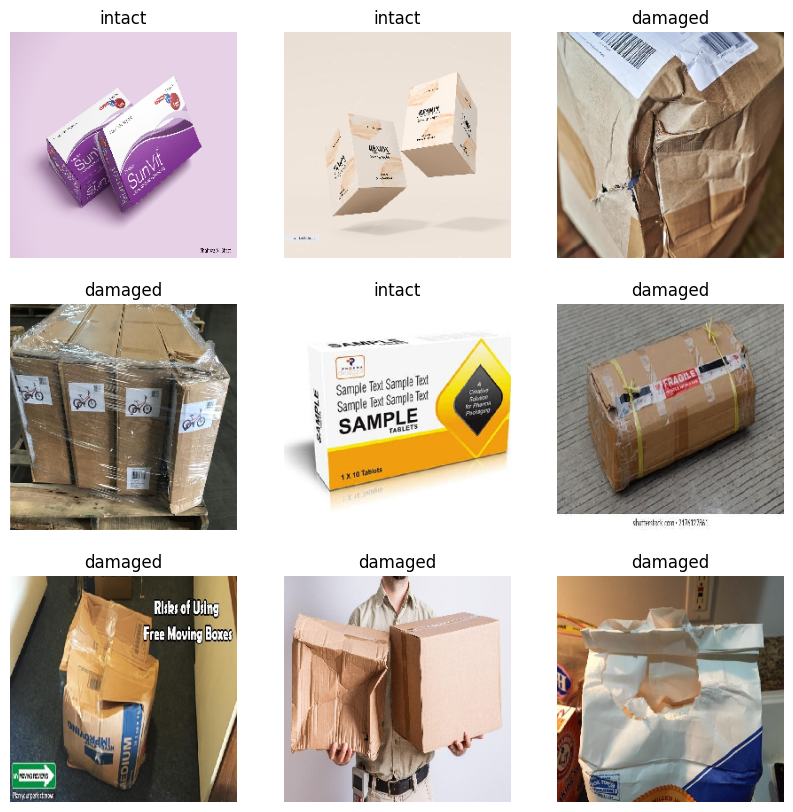

In [32]:

val_iter = iter(valid_generator)
batch = next(val_iter)

images, labels = batch

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [33]:
resnet34_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = resnet34_model.fit(
    train_generator,
    validation_data = test_generator,
    epochs = 3,
    callbacks = [create_model_checkpoint(model_name='resnet34_model.h5')]
)

c:\Users\anubh\Desktop\Model Prediction\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\anubh\Desktop\Model Prediction\env\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5814 - loss: 13.4054

26/26 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - accuracy: 0.5796 - loss: 13.2079 - val_accuracy: 0.5287 - val_loss: 380032.1250
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5095 - loss: 6.7194

26/26 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.5088 - loss: 6.7388 - val_accuracy: 0.5517 - val_loss: 3255.7385
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5398 - loss: 3.1522

26/26 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.5400 - loss: 3.1610 - val_accuracy: 0.5747 - val_loss: 4288.8965


In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

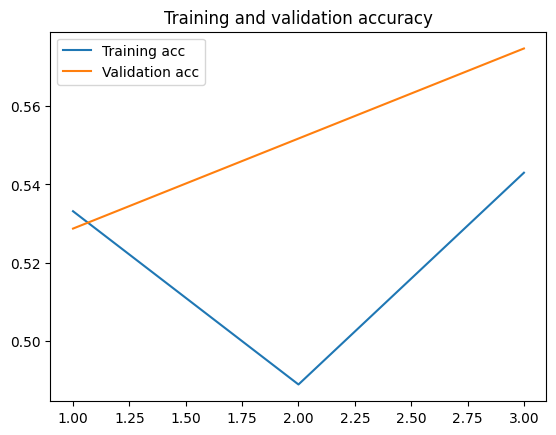

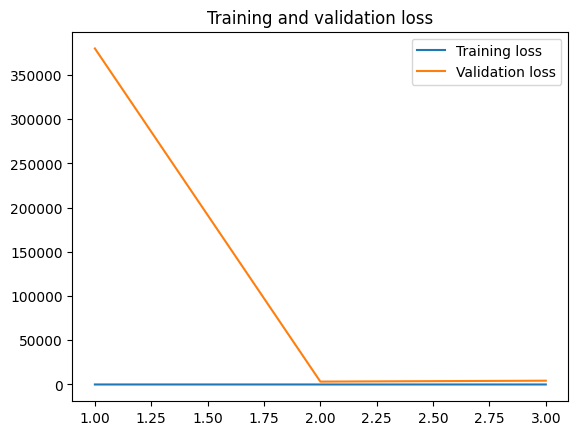

In [35]:

import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:

# Evaluate the model on the test data
test_loss, test_accuracy = resnet34_model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 926ms/step - accuracy: 0.6169 - loss: 3746.3438
Test Loss: 4288.896484375
Test Accuracy: 0.5747126340866089


In [37]:

# Saving the trained model
resnet34_model.save('resnet34_model.h5')